In [1]:
import numpy as np
import pandas as pd
import os
import json
import trimesh
import random

In [2]:
def collect_data():
    labels = []
    stls = []
    
    for rpath in os.listdir("data"):
        if rpath == ".DS_Store":
            continue
        for jpath in os.listdir("data/"+rpath):
            if jpath ==".DS_Store":
                continue
            if jpath == "upper":
                continue
            for idpath in sorted(os.listdir("data/"+rpath+'/'+jpath)):
                if idpath ==".DS_Store":
                    continue
                for item in os.listdir("data/"+rpath+'/'+jpath + '/' + idpath):
                    if item.split('.')[-1] == 'json':
                        labels.append('data/' + rpath + '/'+ jpath + '/' + idpath + '/' + item)
                    elif item.split('.')[-1] == 'obj':
                        stls.append('data/' + rpath + '/'+ jpath + '/' + idpath  + '/' + item)
 

    print('number of label :', len(labels))
    print('number of 3D obj :', len(stls))

    # print(max(shape), min(shape))

    return stls, labels

In [3]:
all_x, all_y = collect_data()
# all_x, all_y = collect_data("data_path_14.csv")


number of label : 750
number of 3D obj : 750


In [21]:
idx = 1

In [5]:
label_map = {
    0 : 0,
    31 : 1,
    32 : 3,
    33 : 5,
    34 : 7,
    35 : 9,
    36 : 11,
    37 : 13,
    38 : 15,
    41 : 2,
    42 : 4,
    43 : 6,
    44 : 8,
    45 : 10,
    46 : 12,
    47 : 14,
    48 : 16
}

In [22]:
f = open(all_y[idx])
label = json.load(f)["labels"]
# label = np.asarray(label, dtype=np.float32)
# label = label.reshape((-1, 1))
# label.shape
# label_mapped = [label_map[i] for i in label]
set(label)

{0, 31, 32, 33, 34, 35, 36, 41, 42, 43, 44, 45, 46}

In [23]:
pc_obj = {i:[] for i in label}
for i in range(len(label)):
    pc_obj[label[i]].append(i)

In [24]:
def normalize_pc(points):
    centroid = np.mean(points, axis=0)
    points -= centroid
    furthest_distance = np.max(np.sqrt(np.sum(abs(points)**2,axis=-1)))
    points /= furthest_distance
    return points

In [25]:
mesh =  trimesh.load(all_x[idx])
vertices = np.asarray(mesh.vertices, dtype=np.float32)
vertices.shape

(79512, 3)

In [26]:
vertices = normalize_pc(vertices)

In [27]:
pc_df = pd.DataFrame()
pc_df["x"] = vertices[:, 0]
pc_df["y"] = vertices[:, 1]
pc_df["z"] = vertices[:, 2]
pc_df["label"] = label

pc_df.head()

,x,y,z,label
0,-0.053843,0.499536,-0.300943,0
1,-0.033672,0.154824,-0.247317,0
2,-0.058583,0.580544,-0.313546,0
3,-0.058734,0.583129,-0.313948,0
4,-0.048800,0.413358,-0.287537,0


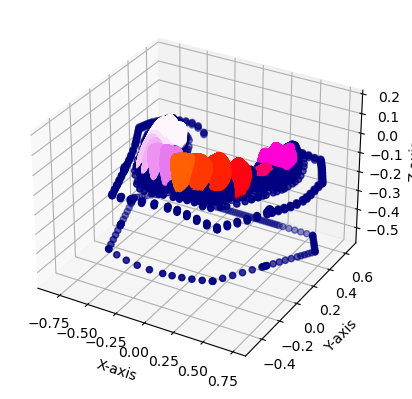

In [28]:
import matplotlib.pyplot as plt
# xr = random.uniform(-0.3, 0.3)

# pc_df_over0 = pc_df[pc_df["x"]>0]
# pc_df_over0 = pc_df_over0[pc_df_over0["y"]>0]
# Assuming 'points' is your point cloud data
x = pc_df["x"]
y = pc_df["y"]
z = pc_df["z"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=pc_df["label"], marker='o', cmap=plt.cm.gist_ncar)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# ax.set_xlim([-10, 10])
# ax.set_ylim([-10, 10])
# ax.set_zlim([-10, 10])
plt.show()

[36 34  0 35]


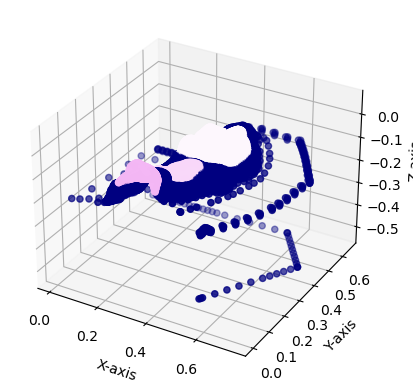

In [29]:
import matplotlib.pyplot as plt
# xr = random.uniform(-0.3, 0.3)

pc_df_over0 = pc_df[pc_df["x"]>0]
pc_df_over0 = pc_df_over0[pc_df_over0["y"]>0]
# Assuming 'points' is your point cloud data
x = pc_df_over0["x"]
y = pc_df_over0["y"]
z = pc_df_over0["z"]
print(pc_df_over0["label"].unique())
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=pc_df_over0["label"], marker='o', cmap=plt.cm.gist_ncar)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# ax.set_xlim([-10, 10])
# ax.set_ylim([-10, 10])
# ax.set_zlim([-10, 10])
plt.show()

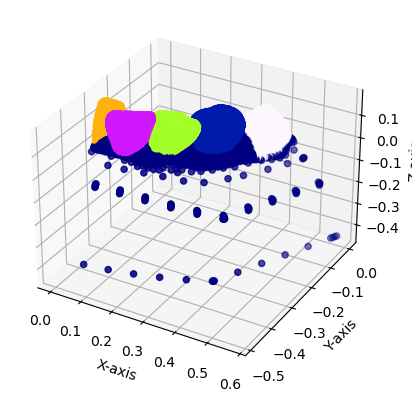

In [40]:
import matplotlib.pyplot as plt
# xr = random.uniform(-0.3, 0.3)
pc_df_over1 = pc_df[pc_df["x"]>0]
pc_df_over1 = pc_df_over1[pc_df_over1["y"]<0]
# pc_df_over1 = pc_df_over1[pc_df_over1["z"]>0]

# Assuming 'points' is your point cloud data
x = pc_df_over1["x"]
y = pc_df_over1["y"]
z = pc_df_over1["z"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=pc_df_over1["label"], marker='o', cmap=plt.cm.gist_ncar)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# ax.set_xlim([-10, 10])
# ax.set_ylim([-10, 10])
# ax.set_zlim([-10, 10])
plt.show()

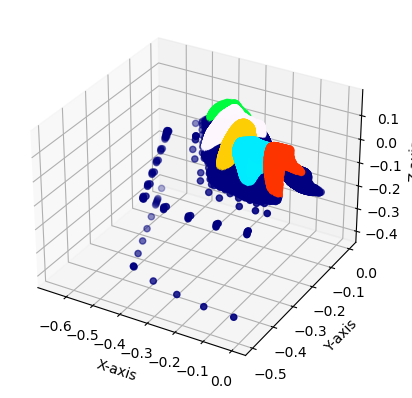

In [13]:
import matplotlib.pyplot as plt
# xr = random.uniform(-0.3, 0.3)
pc_df_over1 = pc_df[pc_df["x"]<0]
pc_df_over1 = pc_df_over1[pc_df_over1["y"]<0]
# Assuming 'points' is your point cloud data
x = pc_df_over1["x"]
y = pc_df_over1["y"]
z = pc_df_over1["z"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=pc_df_over1["label"], marker='o', cmap=plt.cm.gist_ncar)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# ax.set_xlim([-10, 10])
# ax.set_ylim([-10, 10])
# ax.set_zlim([-10, 10])
plt.show()

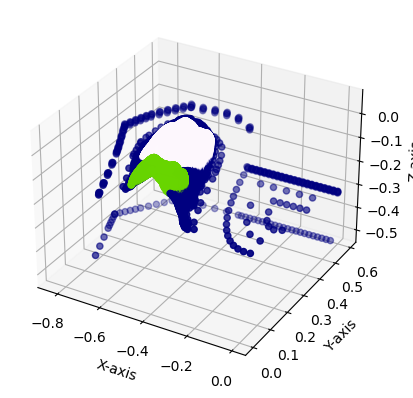

In [14]:
import matplotlib.pyplot as plt
# xr = random.uniform(-0.3, 0.3)
pc_df_over1 = pc_df[pc_df["x"]<0]
pc_df_over1 = pc_df_over1[pc_df_over1["y"]>0]
# Assuming 'points' is your point cloud data
x = pc_df_over1["x"]
y = pc_df_over1["y"]
z = pc_df_over1["z"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=pc_df_over1["label"], marker='o', cmap=plt.cm.gist_ncar)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# ax.set_xlim([-10, 10])
# ax.set_ylim([-10, 10])
# ax.set_zlim([-10, 10])
plt.show()

In [30]:
aug_data = pc_df[pc_df["x"]<0]
aug_data = aug_data[aug_data["y"]<0]


/var/folders/c3/3c9bxgw9061206j6pwvf637m0000gn/T/ipykernel_28621/420412485.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['x'] -= 0.1


,x,y,z,label
12,-0.455372,-0.072527,0.074175,10
44,-0.405383,-0.104723,0.083758,10
49,-0.349203,-0.090570,0.009936,10
53,-0.394562,-0.111850,0.068843,10
61,-0.433095,-0.070767,0.087555,10


[10  0  7  6  2  3]


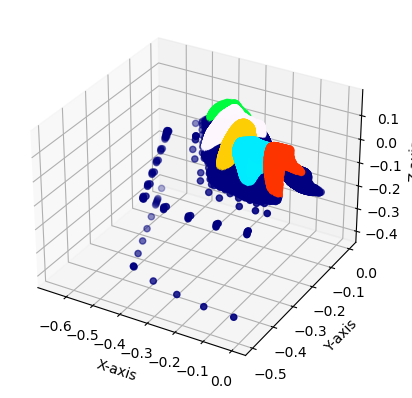

In [18]:
import matplotlib.pyplot as plt
# xr = random.uniform(-0.3, 0.3)


# Assuming 'points' is your point cloud data
x = aug_data["x"]
y = aug_data["y"]
z = aug_data["z"]

print(aug_data["label"].unique())
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=aug_data["label"], marker='o', cmap=plt.cm.gist_ncar)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# ax.set_xlim([-10, 10])
# ax.set_ylim([-10, 10])
# ax.set_zlim([-10, 10])
plt.show()

In [44]:
aug_data = pc_df[pc_df["x"]>0]
aug_data = aug_data[aug_data["y"]<0]

unlabel = aug_data["label"].unique()
print(unlabel)
aug_data_shift = pd.DataFrame()
for c in unlabel:
    tmp = aug_data[aug_data["label"]==c]
    if c == 5:
        tmp['x'] -= 0.05
    aug_data_shift = pd.concat([aug_data_shift, tmp], axis=0)
aug_data_shift.head()

[ 0  9  1 11  5  7]


/var/folders/c3/3c9bxgw9061206j6pwvf637m0000gn/T/ipykernel_28621/3797476954.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['x'] -= 0.05


,x,y,z,label
15,0.128961,-0.184645,0.022116,0
16,0.161903,-0.049320,-0.136498,0
23,0.023515,-0.305139,0.036871,0
90,0.345476,-0.154739,-0.051235,0
91,0.031703,-0.217625,0.037597,0


[ 0  9  1 11  5  7]


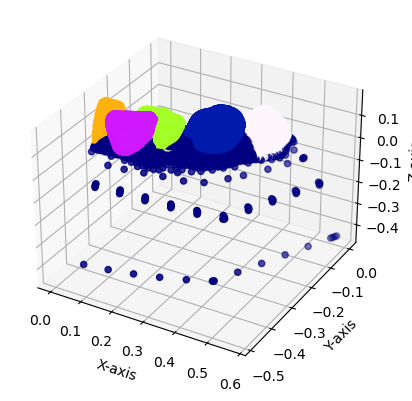

In [45]:
import matplotlib.pyplot as plt
# xr = random.uniform(-0.3, 0.3)


# Assuming 'points' is your point cloud data
x = aug_data_shift["x"]
y = aug_data_shift["y"]
z = aug_data_shift["z"]

print(aug_data_shift["label"].unique())
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=aug_data_shift["label"], marker='o', cmap=plt.cm.gist_ncar)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# ax.set_xlim([-10, 10])
# ax.set_ylim([-10, 10])
# ax.set_zlim([-10, 10])
plt.show()

In [51]:
aug_data = pc_df[pc_df["x"]<0]
aug_data = aug_data[aug_data["y"]<0]

unlabel = aug_data["label"].unique()
print(unlabel)
aug_data_shift = pd.DataFrame()
for c in unlabel:
    tmp = aug_data[aug_data["label"]==c]
    if c == 6:
        tmp['z'] -= 0.05
    aug_data_shift = pd.concat([aug_data_shift, tmp], axis=0)
aug_data_shift.head()

[10  0  7  6  2  3]


/var/folders/c3/3c9bxgw9061206j6pwvf637m0000gn/T/ipykernel_28621/2109369234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['z'] -= 0.05


,x,y,z,label
12,-0.355372,-0.072527,0.074175,10
44,-0.305383,-0.104723,0.083758,10
49,-0.249203,-0.090570,0.009936,10
53,-0.294562,-0.111850,0.068843,10
61,-0.333095,-0.070767,0.087555,10


[10  0  7  6  2  3]


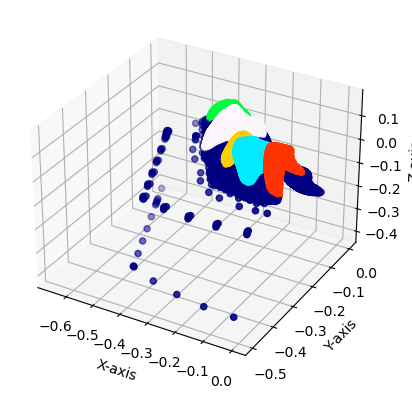

In [52]:
import matplotlib.pyplot as plt
# xr = random.uniform(-0.3, 0.3)


# Assuming 'points' is your point cloud data
x = aug_data_shift["x"]
y = aug_data_shift["y"]
z = aug_data_shift["z"]

print(aug_data_shift["label"].unique())
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=aug_data_shift["label"], marker='o', cmap=plt.cm.gist_ncar)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# ax.set_xlim([-10, 10])
# ax.set_ylim([-10, 10])
# ax.set_zlim([-10, 10])
plt.show()

In [53]:
def drop_teeth(pc:pd.DataFrame):
    unilabel = pc["label"].unique().tolist()
    unilabel.remove(0)
    target_c = random.choice(unilabel)
    pc = pc[pc.label != target_c]
    return pc

In [68]:
aug_data = pc_df[pc_df["x"]>0]
aug_data = aug_data[aug_data["y"]<0]
aug_data_shift = drop_teeth(aug_data)

In [66]:
def normalize_pc(points):
    centroid = np.mean(points, axis=0)
    points -= centroid
    furthest_distance = np.max(np.sqrt(np.sum(abs(points)**2,axis=-1)))
    points /= furthest_distance
    return points

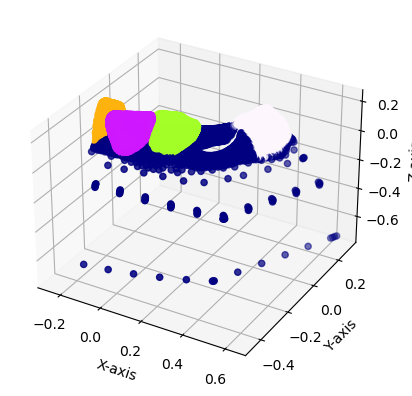

In [69]:
import matplotlib.pyplot as plt
# xr = random.uniform(-0.3, 0.3)
label = aug_data_shift['label'].values
aug_data_shift = aug_data_shift[['x', 'y', 'z']].values
aug_data_shift = normalize_pc(aug_data_shift)
# Assuming 'points' is your point cloud data
x = aug_data_shift[:, 0]
y = aug_data_shift[:, 1]
z = aug_data_shift[:, 2]

# print(aug_data_shift["label"].unique())
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=label, marker='o', cmap=plt.cm.gist_ncar)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# ax.set_xlim([-10, 10])
# ax.set_ylim([-10, 10])
# ax.set_zlim([-10, 10])
plt.show()